In [5]:
import numpy as np
import pandas as pd
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

/var/folders/m7/bn7r1sg94s539hr0hp_6s2_h0000gn/T/ipykernel_36966/4215123762.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# Carga de datos.
datos = pd.read_csv('data/boston.csv', sep="\s+", skiprows=22, header=None)
X = np.hstack([datos.values[::2, :], datos.values[1::2, :2]])
y = datos.values[1::2, 2]
print('Dimensiones de X: ', np.shape(X))

Dimensiones de X:  (242, 16)


In [7]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'MSE': 'neg_mean_squared_error',
  'RMSE': 'neg_root_mean_squared_error',
  'R2':   'r2'
}

In [8]:
# Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

(193, 16)


In [9]:
# Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)

In [10]:
# Construcción del algoritmo de aprendizaje.
reg = linear_model.LinearRegression()

In [11]:
# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_validate(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
#print("cross_val_MAE:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))
pprint(cross_val_results)

{'fit_time': array([0.00241089, 0.0004108 , 0.00031686, 0.00030899, 0.00027895]),
 'score_time': array([0.00042224, 0.00023913, 0.00022817, 0.00020695, 0.00020504]),
 'test_MAE': array([-0.7693745 , -1.0427681 , -0.80023378, -1.47498014, -0.62731328]),
 'test_MSE': array([ -1.26014768,  -2.56368659,  -1.29513732, -15.0346776 ,
        -1.01128263]),
 'test_R2': array([0.97765146, 0.94226833, 0.97016724, 0.70760542, 0.97816587]),
 'test_RMSE': array([-1.12256299, -1.60115165, -1.138041  , -3.87745762, -1.00562549])}


In [12]:
# Entrenamiento con todos los datos para obtener los coeficientes del modelo.
model = reg.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [ 1.66528336e-02  7.41812223e-01  6.50949580e+00  4.21090260e-02
  4.65717521e-01  3.07711362e-02 -1.27130343e-02  4.38405688e-01
  4.13137574e-01 -2.49271611e-01 -2.25780081e-03 -9.44177167e-02
  2.18683119e-01  1.80680831e-01  3.49037295e-02 -8.69819398e-01]

Término independiente:  11.505699481865276


In [13]:
# ---- PREDICCIÓN ---- #

In [14]:
# Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [15]:
# Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)
print(y_pred_test)

[10.34111683  8.40787625  7.60021579 18.19553149  9.74716927 18.07140445
 18.01705486  7.43080072  5.70377647  6.54797533  9.57632921 18.82468657
 17.59399131 18.1412983   1.62513878  6.2273702  17.84930631  6.03800486
 19.64203502  6.59041935  3.44875981  5.89277741  5.21249573  4.92976624
 17.92430532  1.33623546  7.0899459  18.49491268 10.63664822  7.30428135
  6.48947241 18.58251713 10.25670379 19.73155057  5.95314421  6.32971792
 10.80884578 18.44543831 13.47314274  9.44730679  4.25116461  6.47530495
  6.55957092  3.5080622  17.68899047 19.63750924 18.50767748  3.18400593
 11.23607844]


In [16]:
# Cálculo de las métricas de evaluación.
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE:  %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

MAE:  0.6220
MSE:  0.8926
RMSE: 0.9448
R2:   0.9760


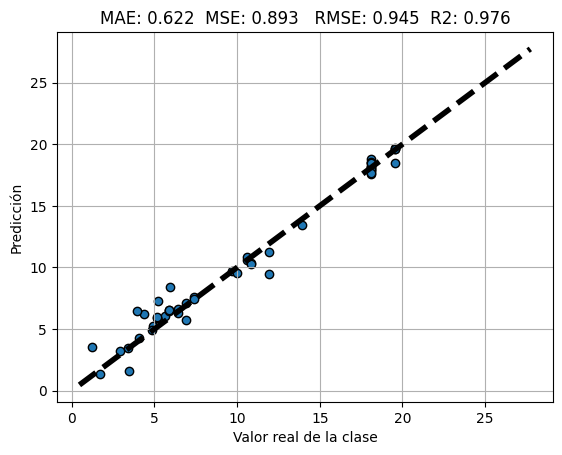

In [17]:
# Gráfica de realidad vs. predicción.
fig, ax = plt.subplots()
ax.scatter(y_testing, y_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Predicción')
plt.title("MAE: %.3f  MSE: %.3f   RMSE: %.3f  R2: %.3f" %
          (MAE, MSE, RMSE, R2))
plt.grid()
plt.show()